In [1]:
# by Terry Zhang in Mystic coders

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
nasadata = pd.read_csv('current_year_nasa.csv', low_memory=False)
yourdata = pd.read_csv('current_year_yoursolarpanels.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [4]:
nasadata['DY'] = pd.to_numeric(nasadata['DY'])
nasadata['MO'] = pd.to_numeric(nasadata['MO'])
nasadata['ALLSKY_SFC_SW_DWN'] = pd.to_numeric(nasadata['ALLSKY_SFC_SW_DWN'])
nasadata['ALLSKY_NKT'] = pd.to_numeric(nasadata['ALLSKY_NKT'])
yourdata['DY'] = pd.to_numeric(yourdata['DY'])
yourdata['MO'] = pd.to_numeric(yourdata['MO'])
yourdata['mean_kilowatt_per_hour'] = pd.to_numeric(yourdata['mean_kilowatt_per_hour'])

In [5]:
sub1 = nasadata[['DY', 'MO', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_NKT']].replace(-999, np.nan)
sub2 = yourdata[['DY', 'MO', 'mean_kilowatt_per_hour']].replace(-999, np.nan)
sub1 = sub1.dropna(subset=['ALLSKY_SFC_SW_DWN'])
sub2 = sub2.dropna(subset=['mean_kilowatt_per_hour'])
sub1.set_index('DY', inplace=True)
sub2.set_index('DY', inplace=True)

In [6]:
sub2['kilowatt_per_day'] = (sub2['mean_kilowatt_per_hour']*24)
#24 hours of sunlight

Text(0.5, 1.0, 'Box Plot for solar irradiance')

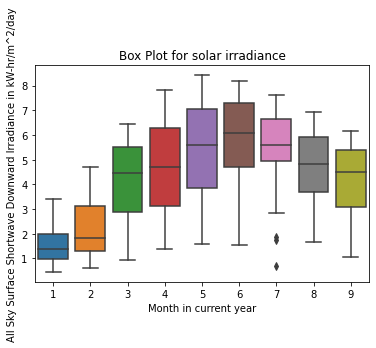

In [7]:
%matplotlib inline
sns.boxplot(data = sub1, x='MO',y='ALLSKY_SFC_SW_DWN')
plt.xlabel('Month in current year')
plt.ylabel('All Sky Surface Shortwave Downward Irradiance in kW-hr/m^2/day')
plt.title('Box Plot for solar irradiance')

In [8]:
yearly_mean = sub1['ALLSKY_SFC_SW_DWN'].mean()
yearly_max = sub1['ALLSKY_SFC_SW_DWN'].max()
yearly_min = sub1['ALLSKY_SFC_SW_DWN'].min()
yearly_total = sub1['ALLSKY_SFC_SW_DWN'].sum()

Text(0.5, 1.0, 'Box Plot for All Sky Normalized Insolation Clearness Index')

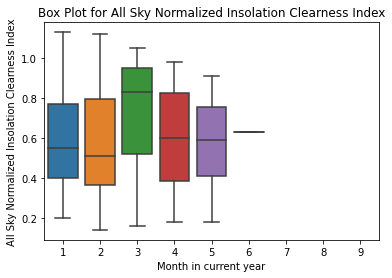

In [9]:
%matplotlib inline
sns.boxplot(data = sub1, x='MO',y='ALLSKY_NKT')
plt.xlabel('Month in current year')
plt.ylabel('All Sky Normalized Insolation Clearness Index')
plt.title('Box Plot for All Sky Normalized Insolation Clearness Index')

Text(0.5, 1.0, 'Box Plot for kilowatt per day')

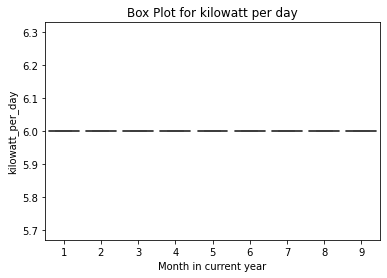

In [10]:
%matplotlib inline
sns.boxplot(data = sub2, x='MO',y='kilowatt_per_day')
plt.xlabel('Month in current year')
plt.ylabel('kilowatt_per_day')
plt.title('Box Plot for kilowatt per day')

In [11]:
yearly_mean_your = sub2['kilowatt_per_day'].mean()
yearly_max_your = sub2['kilowatt_per_day'].max()
yearly_min_your = sub2['kilowatt_per_day'].min()
yearly_total_your = sub2['kilowatt_per_day'].sum()

In [12]:

g1 = sub1.groupby(pd.Index(sub1['MO']))['ALLSKY_NKT'].mean()
g2 = sub1.groupby(pd.Index(sub1['MO']))['ALLSKY_SFC_SW_DWN'].mean()
g3 = sub2.groupby(pd.Index(sub2['MO']))['kilowatt_per_day'].mean()

In [13]:
sub3 = pd.concat([g1,g2,g3], axis=1)

Text(0.5, 1.0, 'Combined Time Series Plot')

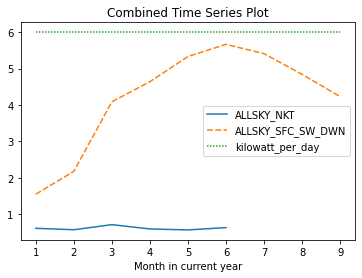

In [14]:
%matplotlib inline
sns.lineplot(data=sub3)
plt.xlabel('Month in current year')
plt.title('Combined Time Series Plot')

In [15]:
print('For your location:')
print(f'The mean of All Sky Surface Shortwave Downward Irradiance in this year is {yearly_mean:.2f} kW-hr/m^2/day')
print(f'The maxmium of All Sky Surface Shortwave Downward Irradiance in this year is {yearly_max:.2f} kW-hr/m^2/day')
print(f'The minimum of All Sky Surface Shortwave Downward Irradiance in this year is {yearly_min:.2f} kW-hr/m^2/day')
print(f'The total of All Sky Surface Shortwave Downward Irradiance in this year is {yearly_total:.2f} kW-hr/m^2/day')

For your location:
The mean of All Sky Surface Shortwave Downward Irradiance in this year is 4.23 kW-hr/m^2/day
The maxmium of All Sky Surface Shortwave Downward Irradiance in this year is 8.44 kW-hr/m^2/day
The minimum of All Sky Surface Shortwave Downward Irradiance in this year is 0.43 kW-hr/m^2/day
The total of All Sky Surface Shortwave Downward Irradiance in this year is 1112.75 kW-hr/m^2/day


In [16]:
print('For your solar system:')
print(f'The mean of kilowatt per day of your solar panels in this year is {yearly_mean_your:.2f} kW-day')
print(f'The maxmium of kilowatt per day of your solar panels in this year is {yearly_max_your:.2f} kW-day')
print(f'The minimum of kilowatt per day of your solar panels in this year is {yearly_min_your:.2f} kW-day')
print(f'The total of kilowatt per day of your solar panels in this year is {yearly_total_your:.2f} kW-day')

For your solar system:
The mean of kilowatt per day of your solar panels in this year is 6.00 kW-day
The maxmium of kilowatt per day of your solar panels in this year is 6.00 kW-day
The minimum of kilowatt per day of your solar panels in this year is 6.00 kW-day
The total of kilowatt per day of your solar panels in this year is 1638.00 kW-day
